#[STEP 1] 데이터 준비하기


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline

In [2]:
# 구글 코랩에서 구글 드라이브에 있는 파일을 가져오기 위해 사용
from google.colab import drive 

# 구글 드라이브 문서를 불러오기 위해 사용, 최초 실행 시에는 구글 인증을 받아야 함.
drive.mount('/gdrive')  

Mounted at /gdrive


In [4]:
# 각자의 구글 드라이브에 해당 폴더들을 만들고 엑셀 파일을 추가해 줌.
data_path = '/gdrive/MyDrive/EBS/Iris.csv' 
iris = pd.read_csv(data_path) 
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# numpy로 변환
np_iris = np.array(iris)
X_data = np_iris[:,1:5]
y_data = np_iris[:,-1]
print(X_data[0:5, :], X_data.shape)
print(y_data[0:5], y_data.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]] (150, 4)
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'] (150,)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(105, 4) (45, 4) (105,) (45,)


#[STEP 2] 훈련 데이터 학습시키기


In [7]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth=3, min_samples_split=4)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#[STEP 3] 평가하기

In [8]:
from sklearn import metrics
tree_pred = tree_model.predict(X_test)
print('Decision tree accuracy:{:.3f}'.format(metrics.accuracy_score(y_test, tree_pred)))

Decision tree accuracy:0.956


#[STEP 4] 시각화하기

In [11]:
import graphviz
from sklearn.tree import export_graphviz

feature_names=['sepal length(cm)','speal width(cm)','petal length(cm)','petal width(cm)']
class_names=['Setosa','Versicolor','Virginica']
out_path='/gdrive/MyDrive/EBS/datatree.dot'

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(tree_model, 
                out_file= out_path,
                feature_names = feature_names,
                class_names = class_names,
                filled = True,                          # class별 color 채우기
                )

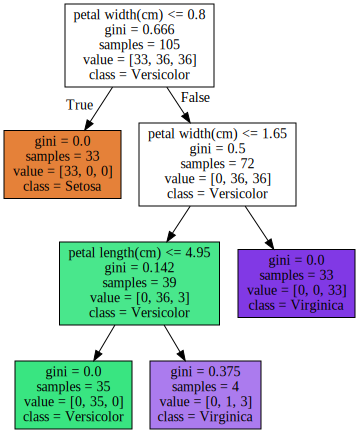

In [ ]:
# 위에서 생성된 tree.dot파일을 Graphviz가 읽어서 코랩에서 시각화
with open(out_path) as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)